# <div style="width: 800px; margin: 40px 0px 0 30px; background-color:#994D1C; padding: 0px; text-align:center; font: bold 5rem 'Fira Sans', sans-serif; border-radius: 25px 15px; color:#E7BCDE;"> Binary Prediction of Smoker Status using Bio-Signals </div>

<hr style="width:100%; color: #B31312; backgorund-color: #B31312; height:2px;">

<img src="https://media.istockphoto.com/id/1294968041/vector/teen-boy-about-to-make-the-bad-decision-on-smoking.jpg?s=612x612&w=0&k=20&c=Pk-xHleX8KqW2gUMik47mnzggTRx8rdiOF_rDLd2WgM=" style="border-radius: 10rem; padding-bottom: 10px; margin-top: 40px; margin-bottom: 35px" alt="smoking-person">

<div style="margin-top: 10px; font:caption; font-size: 18px">This notebook looks into using various Python based machine learning and data science libaries in an attempt to build machine learning model capable of predicting a person smoking or not by using bio-signal status. We're going to take the following approach:
    <ol>
        <li>Problem definition</li>
        <li>Data</li>
        <li>Evaluation</li>
        <li>Features</li>
        <li>Modeling</li>
        <li>Experimentation</li>
    </ol><br>
    <h2>1. Problem Definition</h2>
        <p style="margin-left:40px">In statement,<br> Given many features of bio-signal status of person. Can we predict status of our target are they smoking or nor ? </p>
    <h2>2. Data</h2>
    <p style="margin-left:40px; margin-bottom:25px;">Smoking has been proven to negatively affect health in a multitude of ways.Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world’s overall health.<br>
        <br>According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.<br><br>Evidence-based treatment for assistance in smoking cessation had been proposed and promoted. however, only less than one third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming, and did not routinely do so in daily practice. To overcome this problem, several factors had been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for the physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each individual smoker. Health outcome prediction models had been developed using methods of machine learning over recent years. <br><br> A group of scientists are working on predictive models with smoking status as the prediction target.Your task is to help them create a machine learning model to identify the smoking status of an individual using bio-signals<br></p>
    <a href="https://www.kaggle.com/competitions/playground-series-s3e24/data" style="margin-left:35%; margin-bottom:25px;">Dataset download here</a>
    <h2>3. Evaluation</h2>
     <p style="margin-left:40px; margin-bottom:25px;">Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.<p>
    <h2>4. Features</h2>
    <ul style="margin-left:40px; margin-bottom:25px;">
        <li>Age : 5-years gap</li>
        <li>Height(cm)</li>
        <li>weight(kg)</li>
        <li>waist(cm) : Waist circumference length</li>
        <li>eyesight(left)</li>
        <li>eyesight(right)</li>
        <li>hearing(left)</li>
        <li>hearing(right)</li>
        <li>systolic : Blood pressure</li>
        <li>relaxation : Blood pressure</li>
        <li>fasting blood sugar</li>
        <li>Cholesterol : total</li>
        <li>triglyceride</li>
        <li>HDL : cholesterol type</li>
        <li>LDL : cholesterol type</li>
        <li>hemoglobin</li>
        <li>Urine protein</li>
        <li>serum creatinine</li>
        <li>AST : glutamic oxaloacetic transaminase type</li>
        <li>ALT : glutamic oxaloacetic transaminase type</li>
        <li>Gtp : γ-GTP</li>
        <li>dental caries</li>
        <li>smoking</li>
    </ul><br>
</div>



























# <div style="margin: 40px 0px 0 30px; background-color:#FF8F8F; padding: 20px; text-align:center; font: bold 41px 'Fira Sans', sans-serif; border-radius: 25px 15px; color:#000000;">Preparing Tools and Exploring Dataset</div>

<p style="margin-top: 10px; font:caption; font-size: 18px"> We're going to use pandas, matplotlib and numpy for data analysis and manipulations</p>

In [1]:
# importing tools for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import zipfile
import zipfile


In [2]:
with zipfile.ZipFile('playground-series-s3e24.zip', 'r') as f:
    f.printdir()
    with f.open("train.csv") as train:
        df_train = pd.read_csv(train)
    with f.open("test.csv") as test:
        df_test = pd.read_csv(test)
    with f.open('sample_submission.csv') as submission:
        df_submission = pd.read_csv(submission)

File Name                                             Modified             Size
sample_submission.csv                          2023-09-25 19:08:42      1167892
test.csv                                       2023-09-25 19:08:42      8567013
train.csv                                      2023-09-25 19:08:44     13057675


In [3]:
df_train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [4]:
df_test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [5]:
df_submission

,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5
...,...,...
106166,265422,0.5
106167,265423,0.5
106168,265424,0.5
106169,265425,0.5


In [6]:
# Checking our dataset
def analyzed_dataframe(df):
    """
    Analyzed a pandas Dataframe and provide summary of its characteristics.
    
    Parameters :
    df (pandas.Dataframe) : The input Dataframe to analyzed
    
    Returns
    None
    """
    
    print("Data Information : ")
    print("-------------------")
    display(df.info());
    print("\n")
    
    print("Dataframe Values : ")
    print("-------------------")
    display(df.head().T)
    print('\n')
    
    print("Datafrane Descriptions : ")
    print("-------------------")
    display(df.describe().T)
    print('\n')

    print("Number of Nan Values : ")
    print("-------------------")
    display(df.isnull().sum())
    print("\n")
    
    print("Number of Duplicated Values")
    print("-------------------")
    display(df.duplicated().sum())
    print('\n')
    
    print('Dataframe Shape : ')
    print("-------------------")
    display(f"Rows:{df.shape[0]}, Columns:{df.shape[1]}")

In [7]:
analyzed_dataframe(df_train)

Data Information : 
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 

None



Dataframe Values : 
-------------------


,0,1,2,3,4
id,0.0,1.0,2.0,3.0,4.0
age,55.0,70.0,20.0,35.0,30.0
height(cm),165.0,165.0,170.0,180.0,165.0
weight(kg),60.0,65.0,75.0,95.0,60.0
waist(cm),81.0,89.0,81.0,105.0,80.5
eyesight(left),0.5,0.6,0.4,1.5,1.5
eyesight(right),0.6,0.7,0.5,1.2,1.0
hearing(left),1.0,2.0,1.0,1.0,1.0
hearing(right),1.0,2.0,1.0,1.0,1.0
systolic,135.0,146.0,118.0,131.0,121.0




Datafrane Descriptions : 
-------------------


,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0




Number of Nan Values : 
-------------------


id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64



Number of Duplicated Values
-------------------


0



Dataframe Shape : 
-------------------


'Rows:159256, Columns:24'

In [8]:
# Checking for unique values in each columns
def check_uniques_value(df):
    """
    Explore unique values of each columns and provide their characterictis
    
    Parameters :
    df (pandas.Dataframe) : The input Dataframe to analyzed
    
    Returns
    None
    
    """
    
    for col in df.columns:
        print(f"Columns : {col}, '-->', Length : {len(df[col].unique())}, '-->', Unique Values : {df[col].unique()}")

In [9]:
check_uniques_value(df_train)

Columns : id, '-->', Length : 159256, '-->', Unique Values : [     0      1      2 ... 159253 159254 159255]
Columns : age, '-->', Length : 18, '-->', Unique Values : [55 70 20 35 30 50 45 40 60 25 65 75 80 85 62 69 49 58]
Columns : height(cm), '-->', Length : 14, '-->', Unique Values : [165 170 180 160 155 175 150 181 145 185 140 190 135 139]
Columns : weight(kg), '-->', Length : 28, '-->', Unique Values : [ 60  65  75  95  55  70  50  45  90  80  85 110  40 100 130 105  30 120
 115 125  35 101  89  82  83  99  79  88]
Columns : waist(cm), '-->', Length : 531, '-->', Unique Values : [ 81.   89.  105.   80.5  51.   69.   84.5  73.   68.   64.   80.  103.
  81.8  78.   92.   71.5  90.   93.   85.   86.4  84.   66.   75.   87.5
  91.5  76.   87.   71.   86.   83.   87.2  94.   91.   70.   88.   72.
  93.1  70.4  79.   77.   82.   87.8  97.   85.5  67.   87.3 114.   95.2
  67.2  99.   65.   90.5  74.   73.5  95.   75.8  77.2  98.   91.1  62.
  90.2 101.   89.6  83.4  68.5  72.5  85.7  87.

<p>Summary of Explore 
    <ol>
        <li>There are no Nan Values and no duplicated values in our dataset</li>
        <li>Our train dataset has 24 Columns and 159256 Rows</li>
        <li>In some columns there are more than 3 unique values</li>
    </ol>
</p>
<p>Next step are : 
    <ol>
        <li>Checking statistic of the dataset using ANOVA</li>
        <li>Select columns that have less than equals to 3 unique values</li>
        <li>Visualized our dataset, to have more insight about the train dataset</li>
    </ol>
</p>

# <div style="margin: 40px 0px 0 30px; background-color:#FF8F8F; padding: 20px; text-align:center; font: bold 41px 'Fira Sans', sans-serif; border-radius: 25px 15px; color:#000000;">Analysis of Variance</div>

<p>The purpose of using anovs is to compare the difference between the means of two or more groups of data, and measure the degree to which levels or groups of an independent variable differ from each other. The purpose of an ANOVA test is to determine if there is a significant difference between the groups being studied by using variance. This is done using the 'f-test' in statistics to determine if the variables are significant.</p>



## $ F = \frac{MST}{MSE} $

where : <br>
F is ANOVA.<br>
MST is the mean of the sum of the squares due to treatment.<br>
MSE is the mean of the sum of the squares due to error.<br>
Soruce: <a href="https://study.com/academy/lesson/analysis-of-variance-anova-examples-definition-application.html"> ANOVA Test Definition, Purpose & Examples</a>


In [10]:
# import libaries

import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [11]:
def perform_one_way_anova(df,independent_var1, independent_var2, dependent_var='smoking'):
    """
    Compare the diffrence between the means of two or more groups of data
    
    Parameters :
    df (pandas.Dataframe) : The input Dataframe to analyzed
    dependent_var : it is the variable being measured
    independent_var1 : is the variable that is manipulated in an experiment
    independent_var2 : is the variable that is manipulated in an experiment
    
    Returns
    Rejecting Null Hypotesis or Fail to reject null hypotesis
    """
    # Perform one-way Anova
    statistic, p_value = stats.f_oneway(df[dependent_var], df[independent_var1], df[independent_var2])
    # Print the results
    print("ANOVA Statistic :")
    print('-----------------')
    display(round(statistic,2))
    print('\n')
    
    print("P-Value :")
    print('-----------------')
    display(p_value)
    print('\n')
    
    # Checking the p-value to determined 
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypotesis")
    else:
        print("Fail to reject null hypotesis")
    

In [12]:
perform_one_way_anova(df=df_train, independent_var1='age', independent_var2='fasting blood sugar')

ANOVA Statistic :
-----------------


3060719.53



P-Value :
-----------------


0.0



Reject the null hypotesis


In [13]:
tukey = pairwise_tukeyhsd(endog=df_train['smoking'],
                          groups=df_train['Urine protein'],
                          alpha=0.05)

In [14]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0739    0.0 -0.0931 -0.0547   True
     1      3  -0.0704    0.0 -0.1006 -0.0402   True
     1      4  -0.0428 0.4126 -0.1076   0.022  False
     1      5  -0.0898 0.6268 -0.2541  0.0745  False
     1      6  -0.4411 0.2473  -1.018  0.1357  False
     2      3   0.0035 0.9998 -0.0319  0.0389  False
     2      4   0.0311 0.7778 -0.0363  0.0984  False
     2      5  -0.0159 0.9998 -0.1812  0.1494  False
     2      6  -0.3673 0.4569 -0.9444  0.2099  False
     3      4   0.0276 0.8804 -0.0437  0.0989  False
     3      5  -0.0194 0.9995 -0.1863  0.1476  False
     3      6  -0.3707 0.4468 -0.9483  0.2069  False
     4      5   -0.047 0.9743 -0.2235  0.1296  False
     4      6  -0.3983 0.3682 -0.9788  0.1821  False
     5      6  -0.3514 0.5521 -0.9511  0.2484  False
----------------------------------------------

<p>Summary of Statistic
    <ol>
        <li>We're succsesfull to reject null hypotesis for age and fasting blood sugar</li>
        <li></li>
        <li></li>
    </ol>
</p>

# <div style="margin: 40px 0px 0 30px; background-color:#FF8F8F; padding: 20px; text-align:center; font: bold 41px 'Fira Sans', sans-serif; border-radius: 25px 15px; color:#000000;">Visualization</div>

In [15]:
# Before we viusalize our data, let's group data for object
columns_object = []
for col in df_train.columns:
    if len(df_train[col].unique()) <= 6:
        columns_object.append(col)

In [16]:
df_col = df_train[columns_object]
df_col

,hearing(left),hearing(right),Urine protein,dental caries,smoking
0,1,1,1,0,1
1,2,2,1,1,0
2,1,1,1,0,1
3,1,1,1,1,0
4,1,1,1,0,1
...,...,...,...,...,...
159251,1,1,1,0,0
159252,1,1,1,0,0
159253,1,1,1,0,0
159254,1,1,1,0,1


In [17]:
df_col.smoking.value_counts()[0]

89603

In [18]:
font_dict = {'family':'serif',
                 'color':'darkred',
                 'size':15}

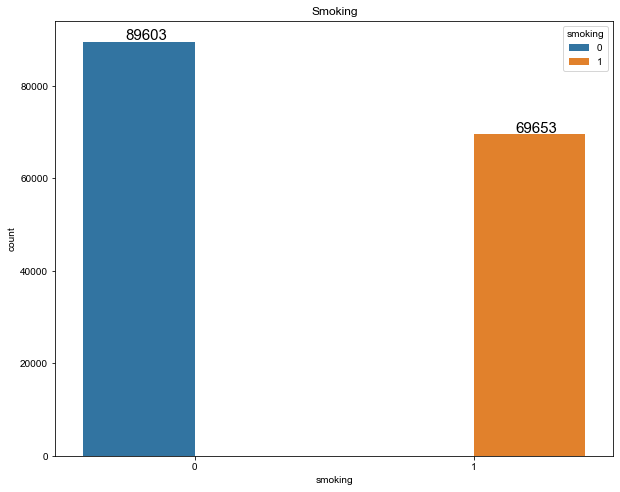

In [19]:
plt.figure(figsize=(10,8))
plt.title("Smoking")
sns.countplot(df_col, x='smoking', hue='smoking')
plt.annotate(text=f"{df_col.smoking.value_counts()[0]}", xy=(-0.25,90000), fontsize=15)
plt.annotate(text=f"{df_col.smoking.value_counts()[1]}", xy=(1.15,70000), fontsize=15)
sns.set_theme(style='darkgrid')
plt.show();

In [20]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i+1, y[i], y[i], ha='center', fontdict={'family':"Tahoma", 'weight':'normal', 'size':22})
        
def different_colors(col_count, f_color, s_color):
    """
    Given different color to gain insight for the visualization
    -----------------------------------------------------------
    col_count = Value count for the column
    f_color = first color, better used the bright color
    s_color = second color
    """
    new_color =[]
    compare_value = 0
    for val in col_count.values:
        if val > compare_value:
            compare_value = val
            new_color.append(f_color)
        else:
            new_color.append(s_color)
    return new_color

def bar_plot_for_dataset(data, col, col_title, x_name, y_name, colors, hatch='/',):
    """
    ---This function is to visualize data to bar plot---
    parameteres:
    data :  The input Dataframe to analyzed
    col 
    \n

    """
    cols_sum = data[col].value_counts()
    labels = list(cols_sum.index)
    plt.figure(figsize=(10,8))
    ax = plt.subplot()
    make_colors = different_colors(col_count=cols_sum, f_color=colors[0], s_color=colors[1])
    plt.bar(x=cols_sum.index, height=cols_sum.values, data=cols_sum, color=make_colors, hatch='/')
#     add_labels(cols_sum.index, cols_sum.values)
    plt.title(col_title, fontdict={'family': 'Arial','weight': 'normal','size': 30,})
    plt.xlabel(x_name, fontdict={'family': 'Arial','weight': 'normal','size': 14,})
    plt.ylabel(y_name, fontdict={'family': 'Arial','weight': 'normal','size': 14,})
    plt.xticks(rotation=30, ha='right')
    plt.show()

In [21]:
cols_sum = df_col['Urine protein'].value_counts()[:6]
cols_sum

1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: Urine protein, dtype: int64

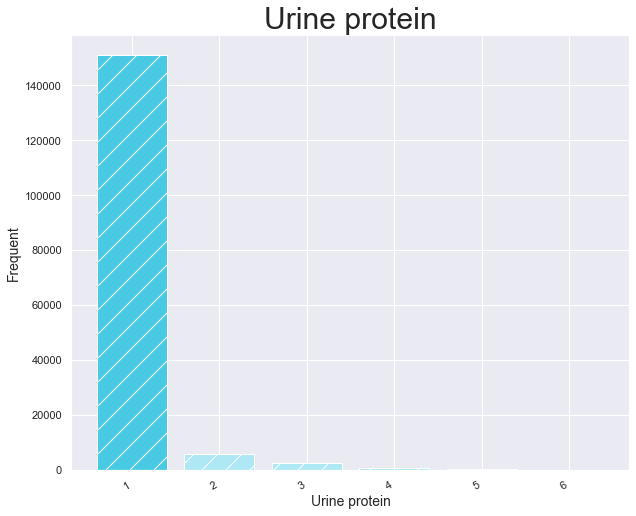

In [22]:
colors = ["#48cae4", "#ade8f4"]
bar_plot_for_dataset(df_col, col="Urine protein", col_title="Urine protein", x_name='Urine protein', 
                     y_name='Frequent', colors=colors,)

<Figure size 720x3600 with 0 Axes>

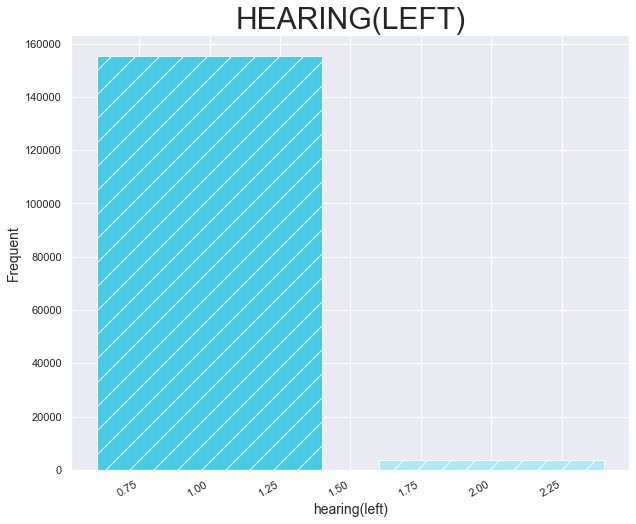

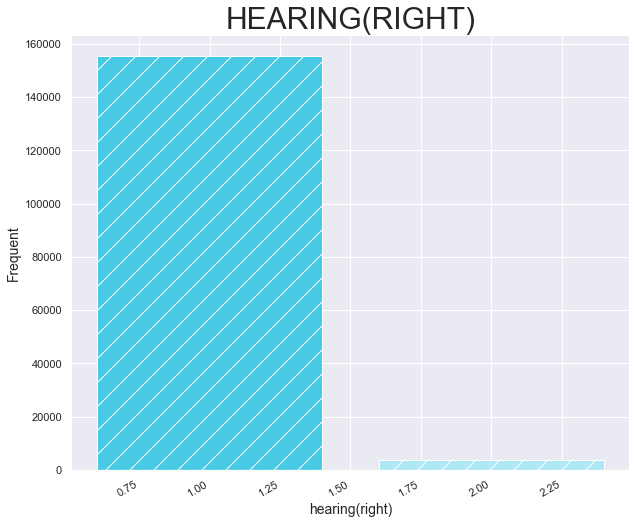

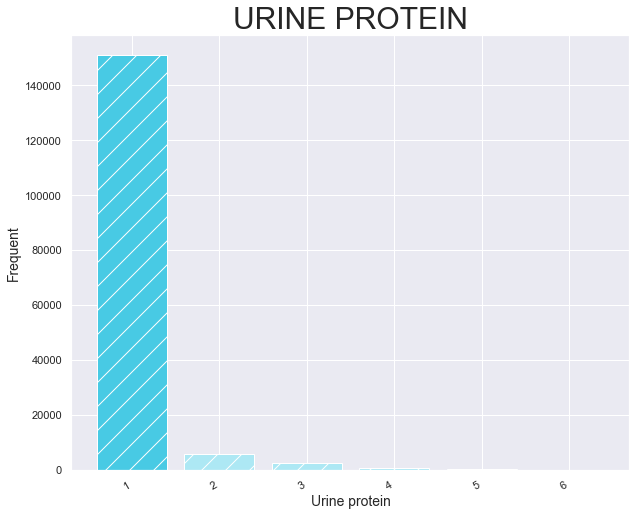

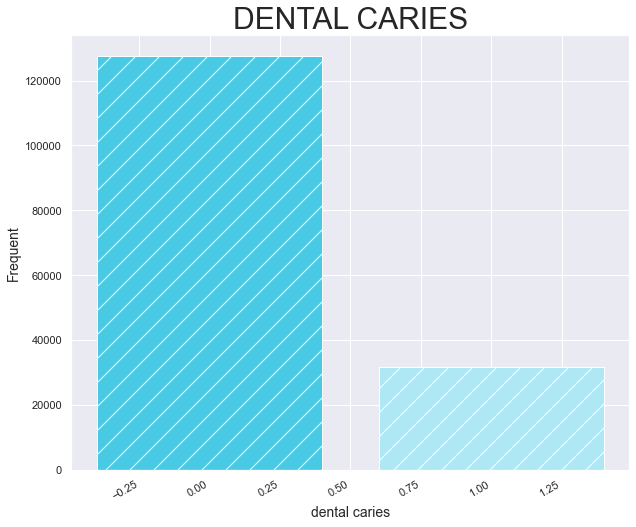

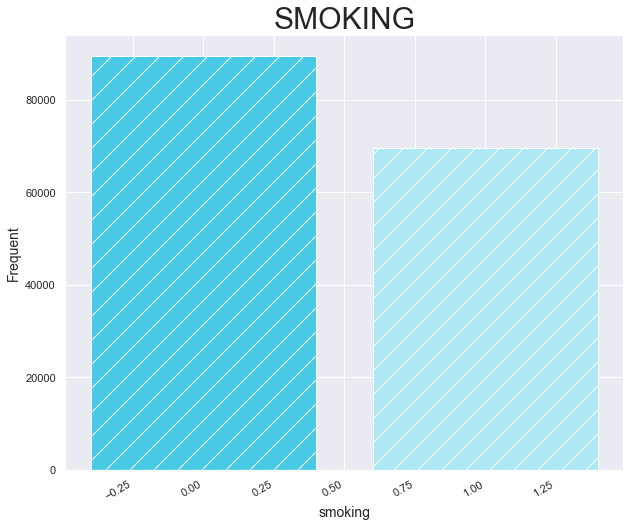

In [23]:
colors = ["#48cae4", "#ade8f4"]

fig = plt.figure(figsize = (10,50))

for col in df_col.columns:
    bar_plot_for_dataset(df_col, col, col_title=col.upper(), x_name=col, y_name="Frequent", 
                         colors=colors)

In [24]:
num_cols = [col for col in df_train.columns if col not in df_col.columns][1:]
len(num_cols)

18

In [25]:
df_num = df_train[num_cols]
df_num

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1.0,22,25,27
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1.1,27,23,37
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1.0,20,27,30
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,127,80,64,238,47,72,159,14.5,0.8,25,26,13
159252,50,155,75,82.0,1.0,1.0,120,80,89,213,202,64,108,14.5,0.6,21,20,18
159253,40,160,50,66.0,1.5,1.0,114,70,84,189,45,87,93,10.9,0.6,15,9,12
159254,50,165,75,92.0,1.2,1.0,121,90,122,165,148,55,80,14.4,1.1,22,17,37


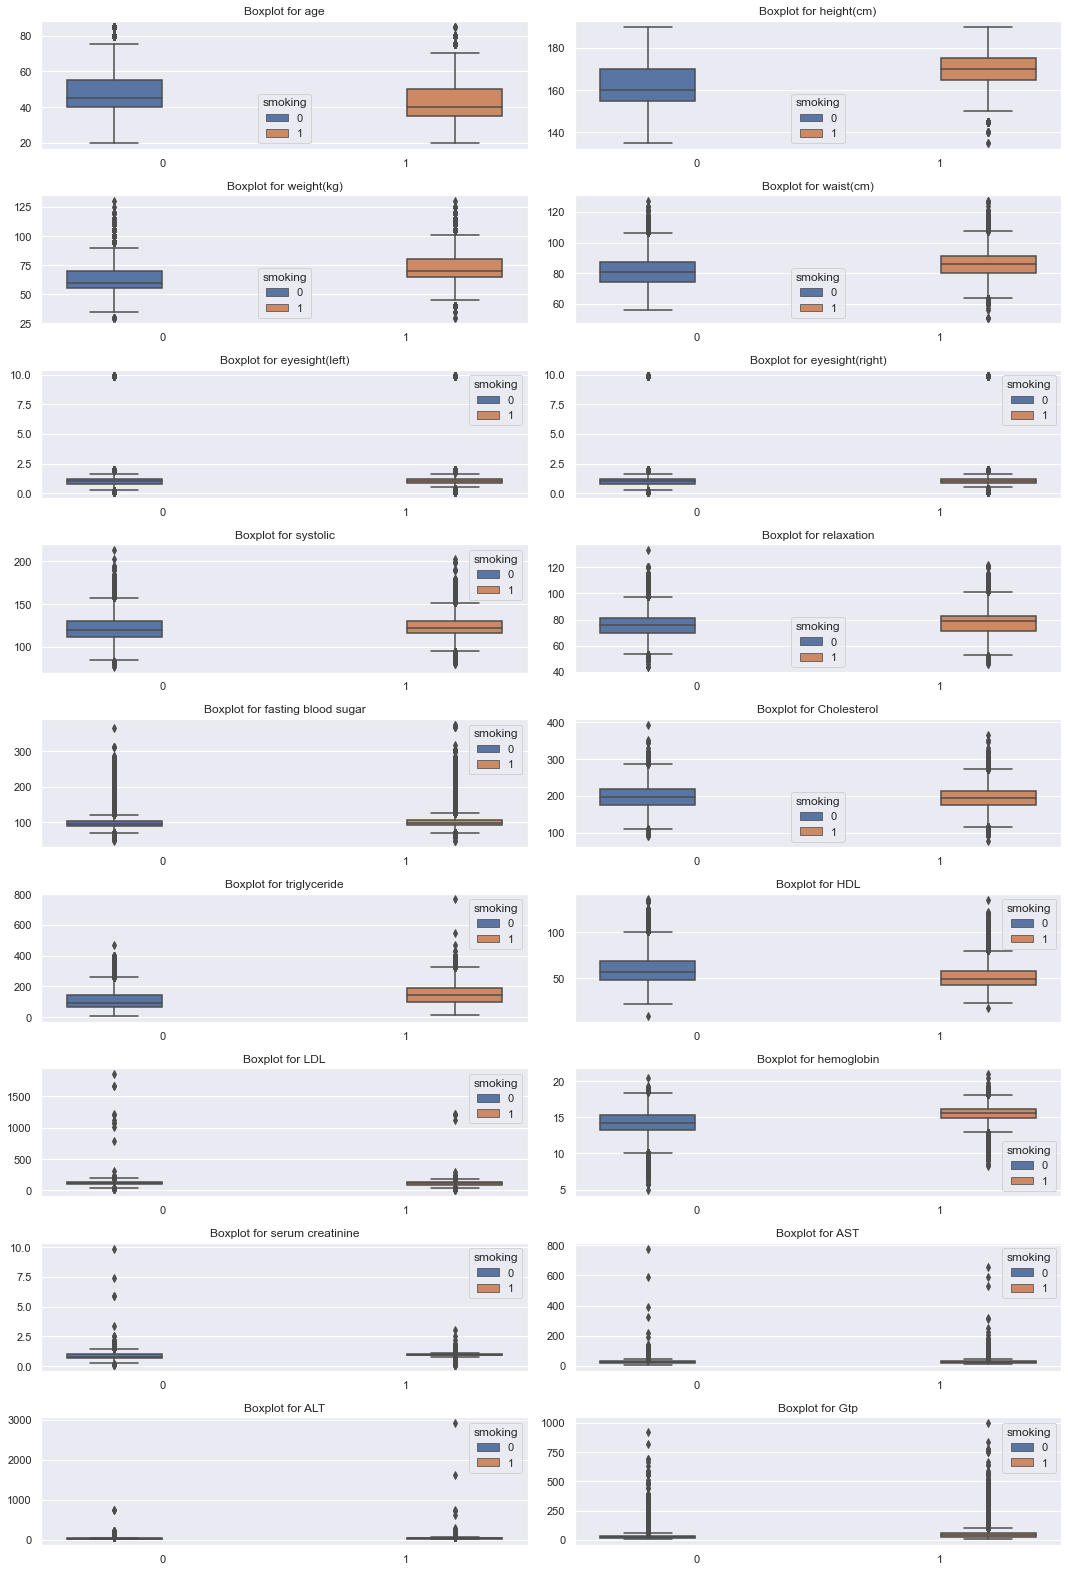

In [26]:
row = len(num_cols)
col = 2
counter = 1

fig, axes= plt.subplots(9,2, figsize=(15,22))
axes = axes.flatten()

for i, num_col in enumerate(num_cols):
    if i <19:

        sns.boxplot(data=df_train,x="smoking",y=num_col,hue='smoking',ax=axes[i])

        axes[i].set_title(f"Boxplot for {num_col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

In [27]:
def cat_num_plot(cat_columns="String Value"):
    """
     ---This function is to visualize data to box plot---
    parameteres:
    cat_columns = Input columns name from cat_cols
    \n
    """
    fig, axes = plt.subplots(9,2, figsize=(15, 22))
    axes = axes.flatten()
    
    plt.subplots_adjust(wspace=1.5)
    plt.suptitle(f"Boxplot for {cat_columns} and all numerical columns",
                 fontdict={'family': 'Arial','weight': 'normal','size': 30,})
    
    for i, num_col in enumerate(num_cols):
        sns.boxplot(x=df_train[cat_columns], y=df_train[num_col], hue=df_train['smoking'],
                   ax=axes[i])
        axes[i].set_title(f"Boxplot for {num_col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
    
    plt.tight_layout()
    plt.show()
    

In [28]:
columns_object

['hearing(left)',
 'hearing(right)',
 'Urine protein',
 'dental caries',
 'smoking']

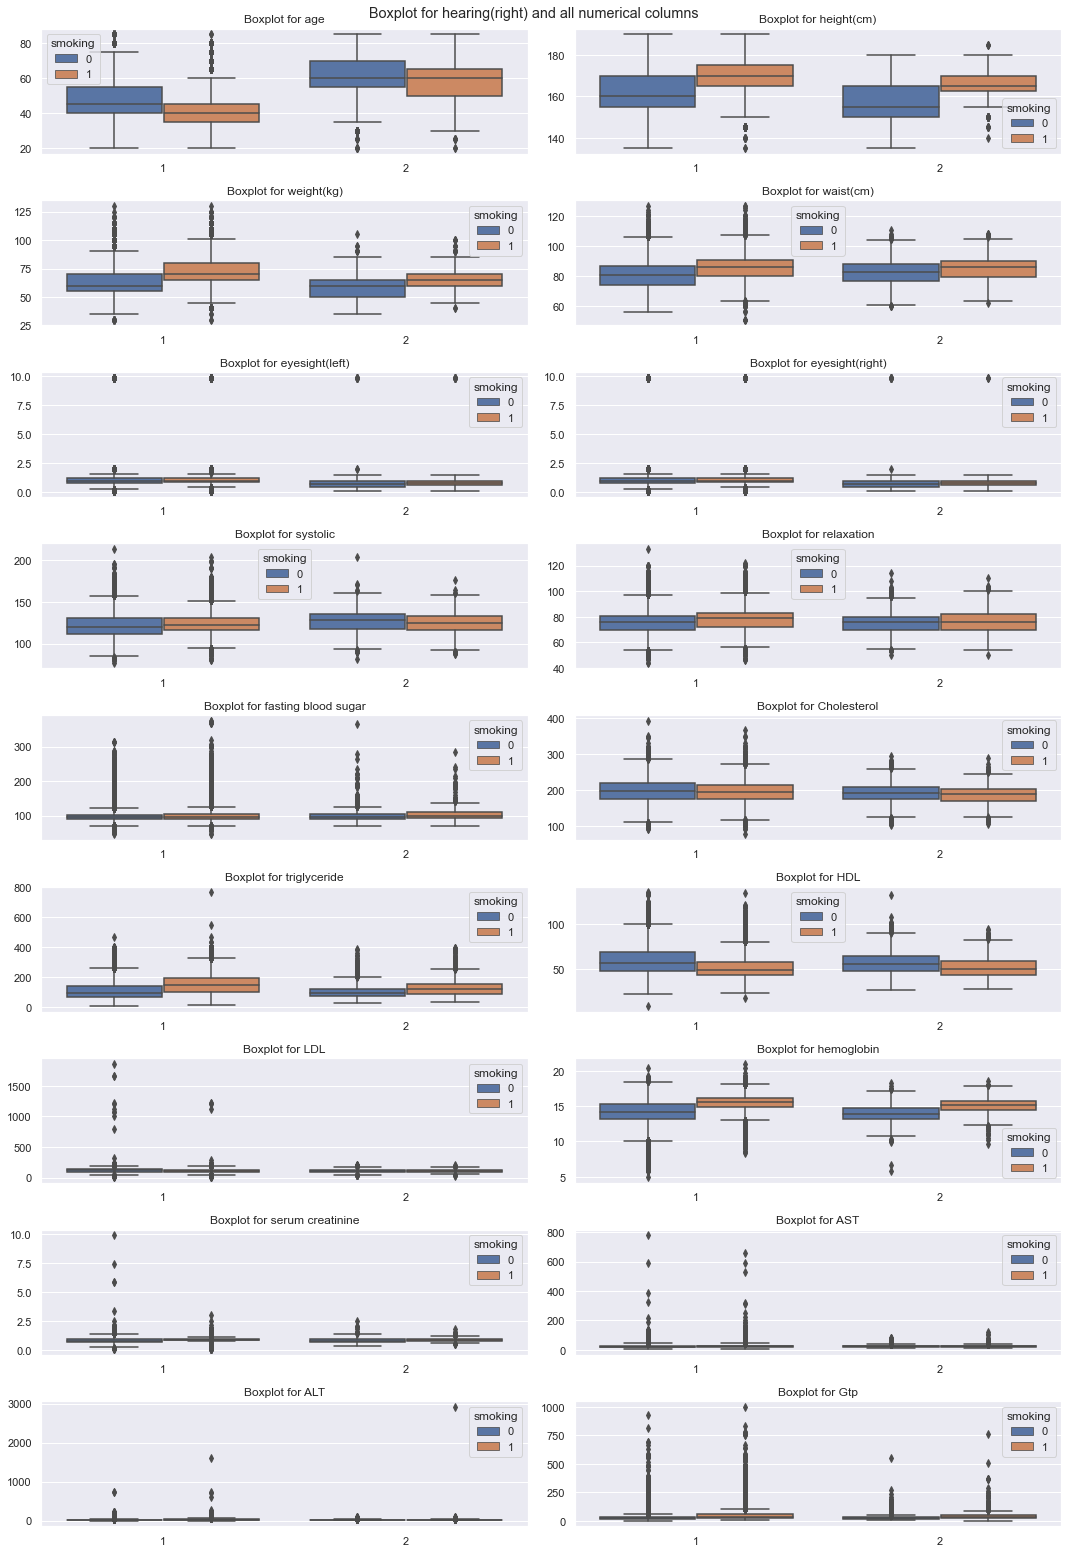

In [29]:
cat_num_plot(columns_object[1])

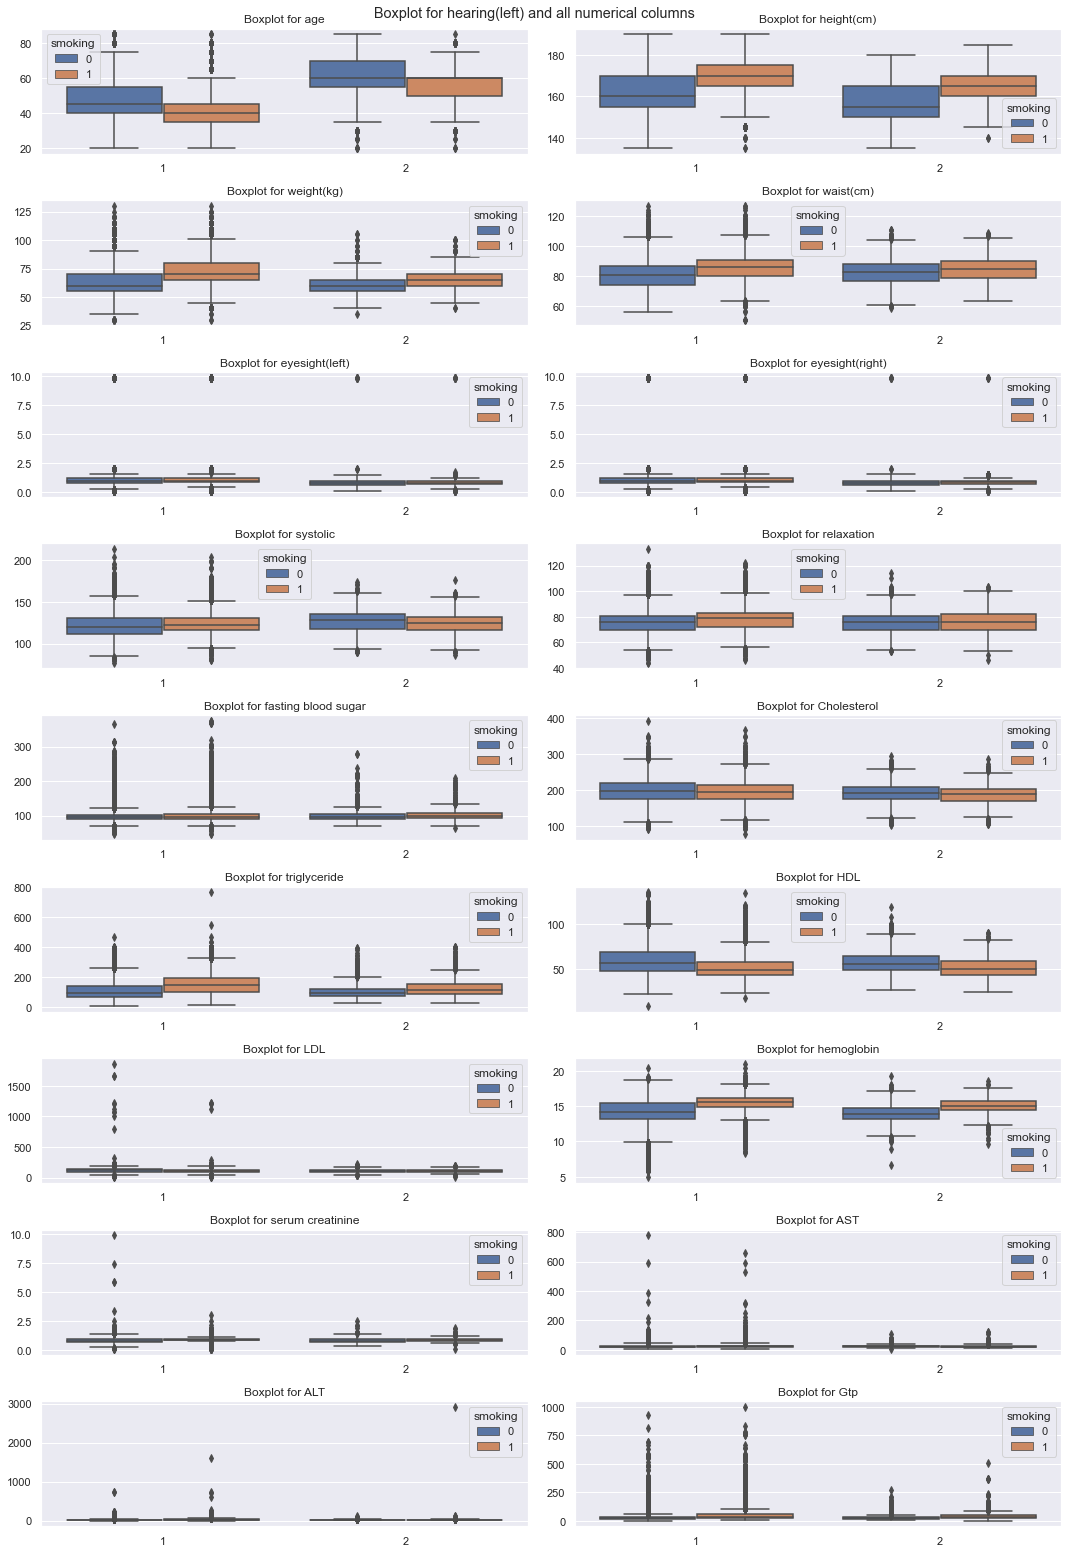

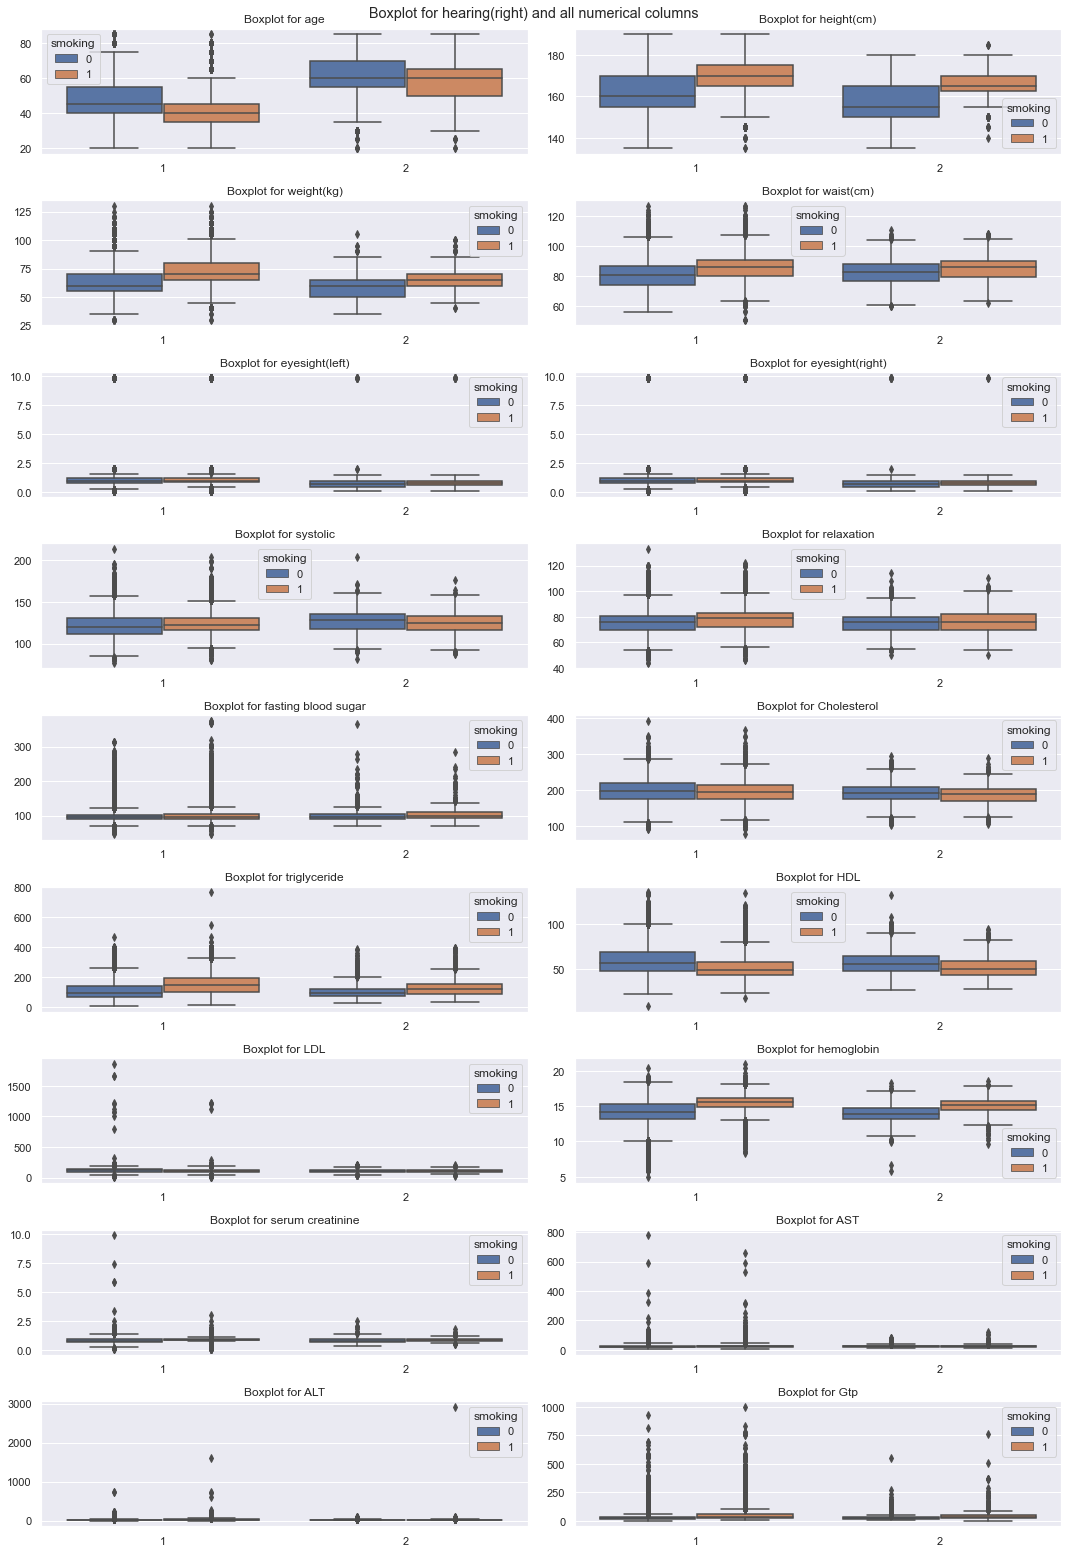

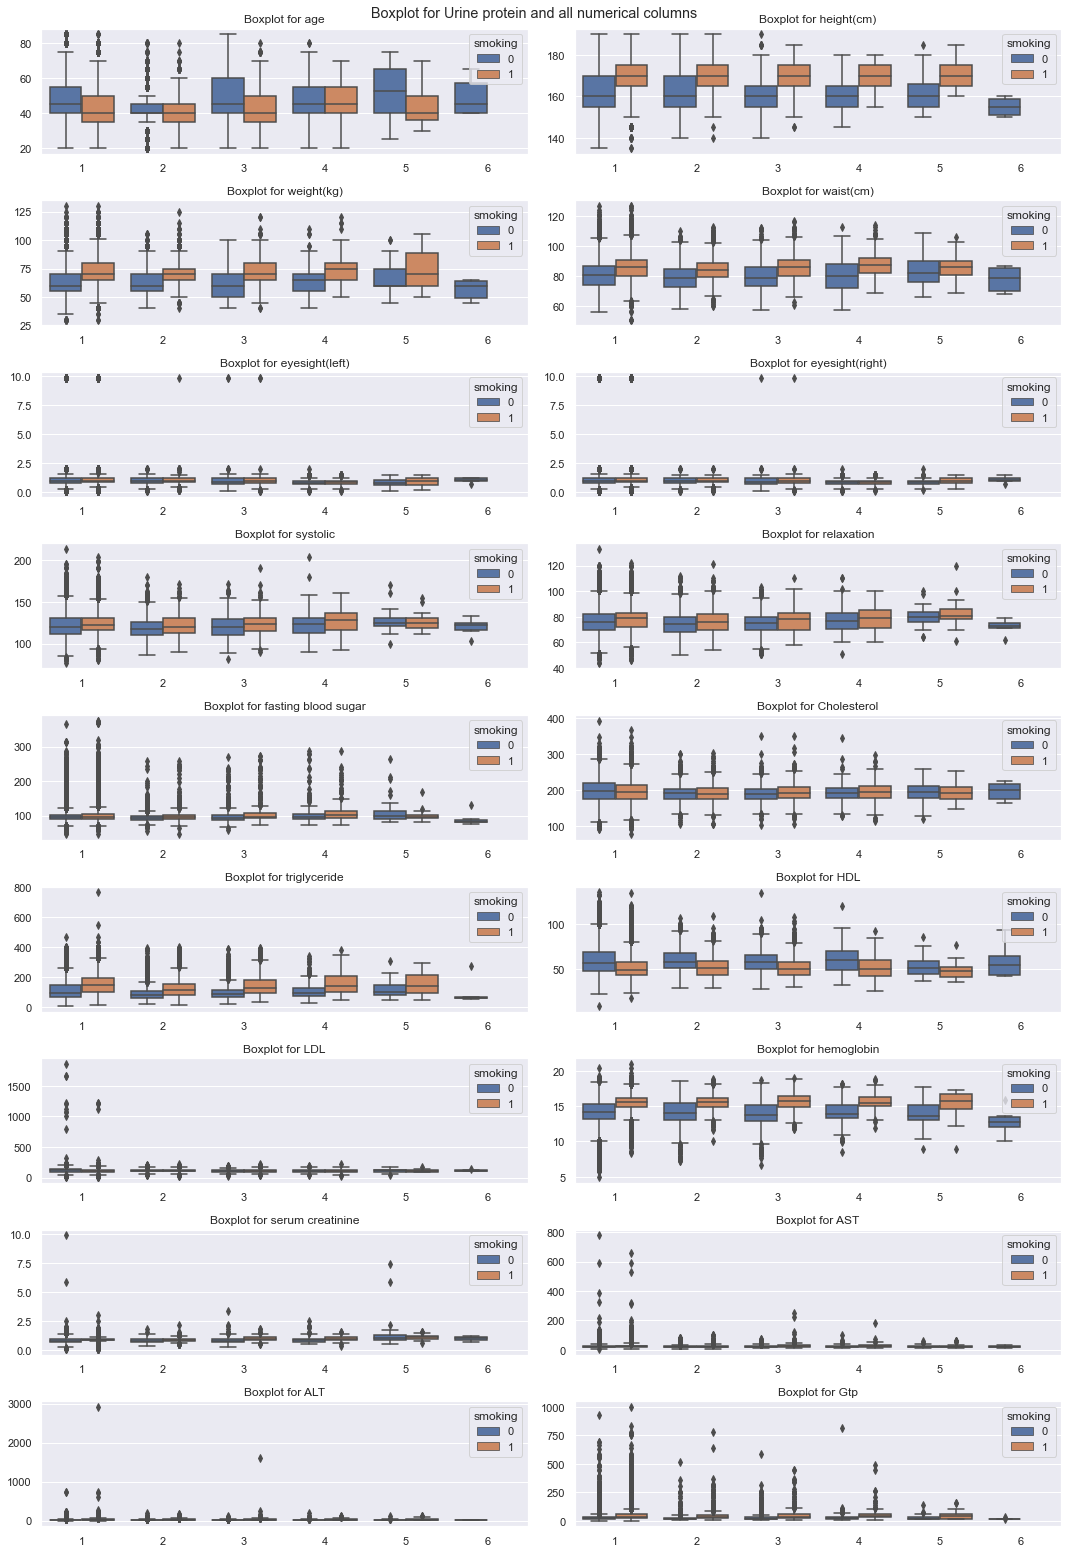

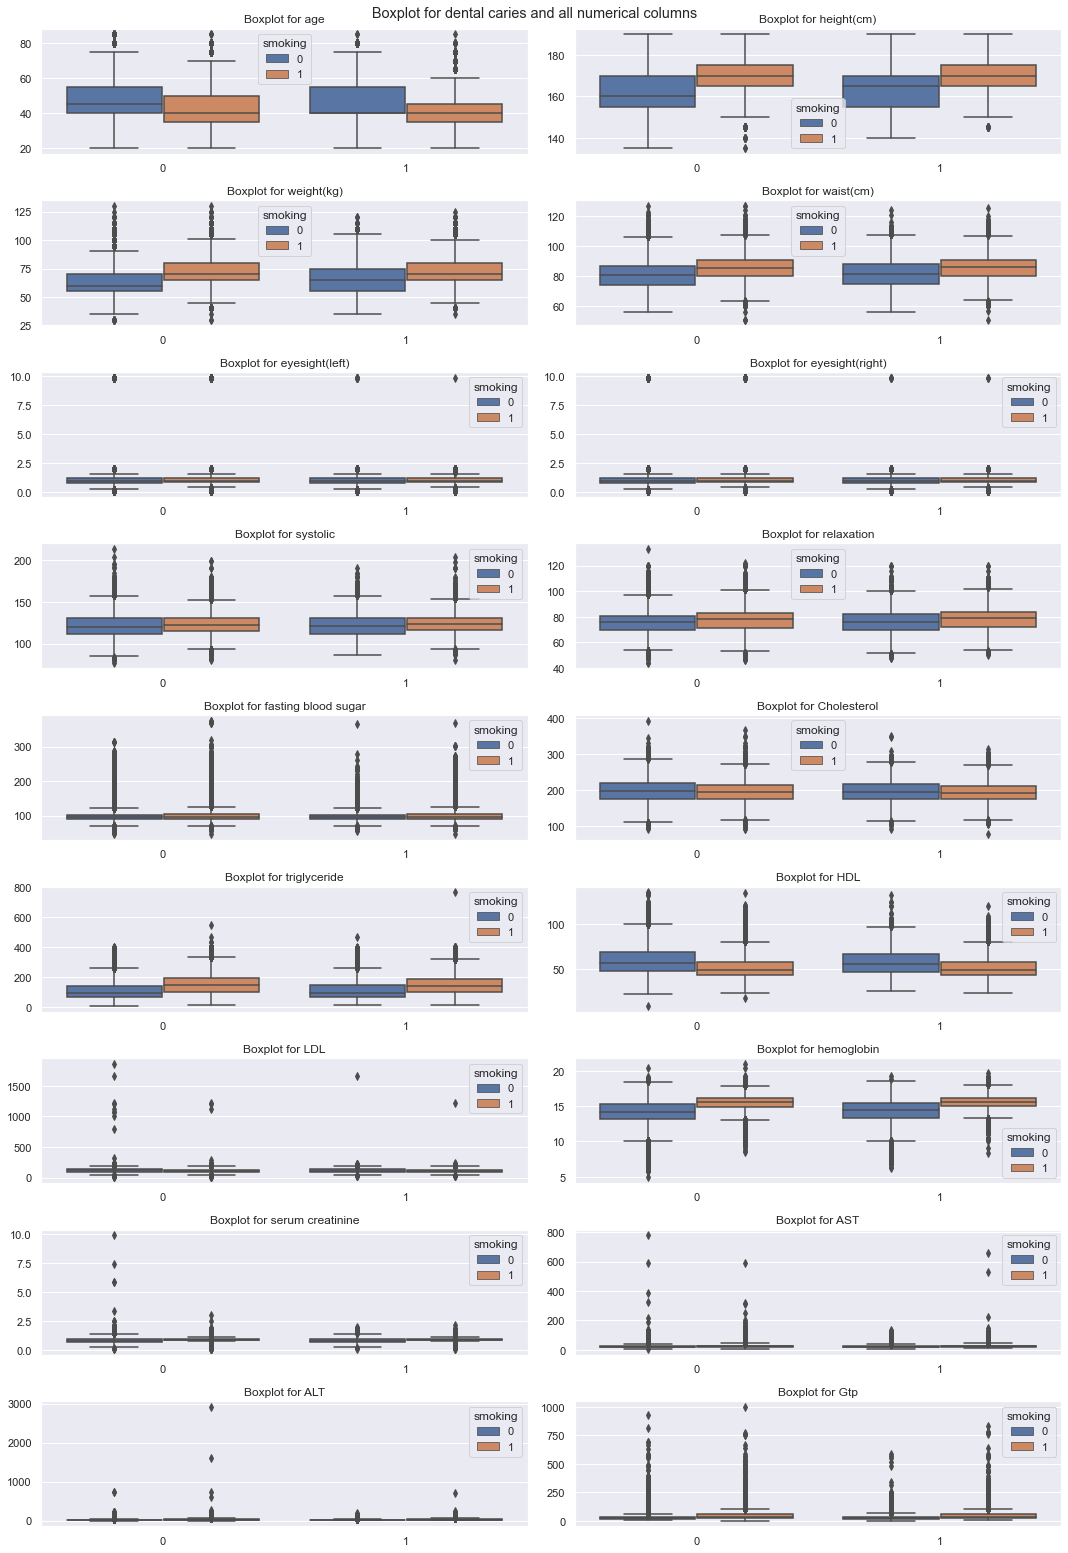

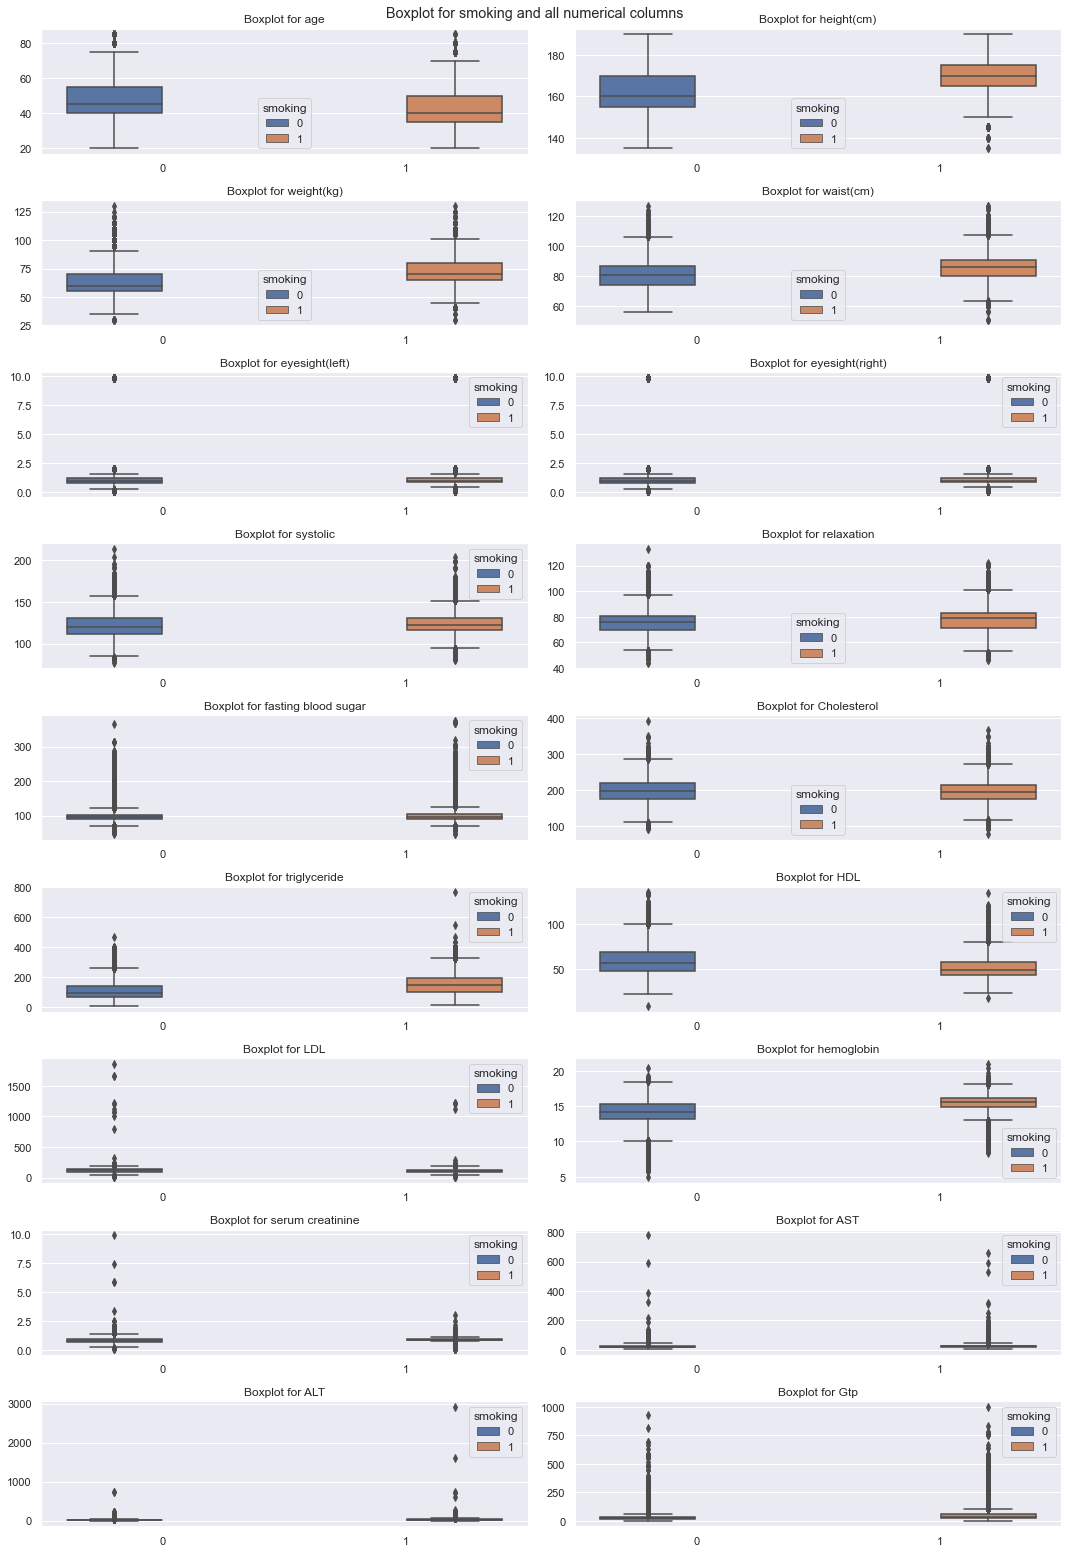

In [30]:
for col in columns_object:
    cat_num_plot(col)

In [31]:
df_train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


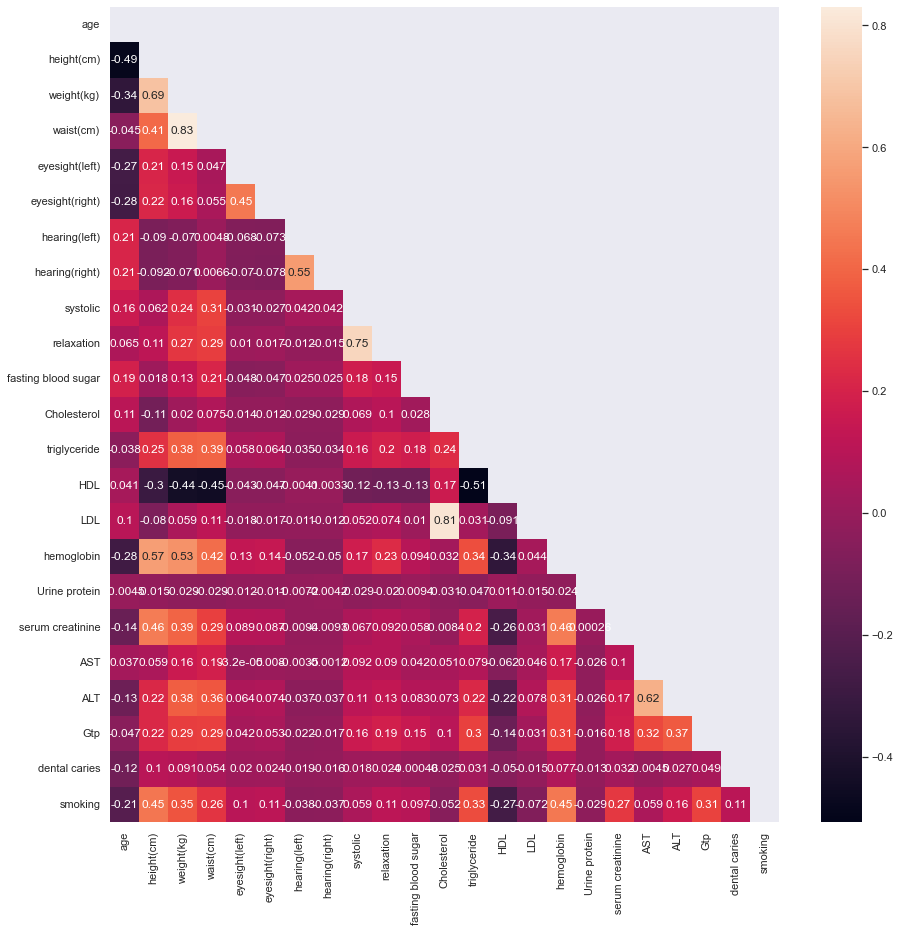

In [32]:
# data correlation
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(df_train.iloc[:, 1:].corr()))
cor_heatmap = sns.heatmap(df_train.iloc[:, 1:].corr(), mask=mask, annot=True)
plt.show()

In [33]:
correlation_matrix = df_train.iloc[:,1:].corr()
correlation_matrix.iloc[:-1,-1].sort_values(ascending=False)

hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
waist(cm)              0.262715
ALT                    0.163016
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
AST                    0.059394
systolic               0.058642
Urine protein         -0.028548
hearing(right)        -0.036858
hearing(left)         -0.038219
Cholesterol           -0.051896
LDL                   -0.072285
age                   -0.206033
HDL                   -0.271186
Name: smoking, dtype: float64

# <div style="margin: 40px 0px 0 30px; background-color:#FF8F8F; padding: 20px; text-align:center; font: bold 41px 'Fira Sans', sans-serif; border-radius: 25px 15px; color:#000000;">Machine Learning</div>

In [34]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, PowerTransformer, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [35]:
X_raw = df_train.drop(['id', 'smoking'], axis=1)
y_raw = df_train.smoking

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, 
                                                                    test_size=0.2, random_state=321)


In [36]:
rand_for = RandomForestClassifier()
rand_for.fit(X_train_raw, y_train_raw)
pred_raw = rand_for.predict(X_test_raw)

In [37]:
scrore = precision_score(y_test_raw, pred_raw)
scrore

0.7163332908650784

In [38]:
confusion_matrix(y_test_raw, pred_raw)

array([[13401,  4453],
       [ 2753, 11245]], dtype=int64)

C:\Users\bayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


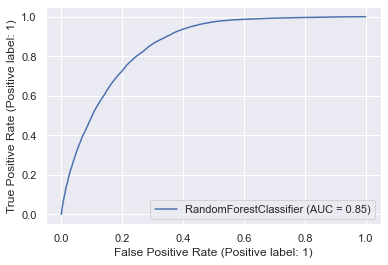

In [39]:
plot_roc_curve(rand_for, X_test_raw, y_test_raw)

In [40]:
num_features=num_cols
cat_features=columns_object[:-1]

In [41]:
cat_features

['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']

In [42]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', Normalizer())
])

cat_pipeline = Pipeline([
    ('cat', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, num_features),
                                              ('cat', cat_pipeline, cat_features)]
                                )

In [43]:
rand_for_pipeline = Pipeline(steps=[("preprocessor", preprocessor), 
                                    ("rand_forest", RandomForestClassifier())])

params =  {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__num__scaler":[StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler(),
                                FunctionTransformer(np.log)],
    "rand_forest__n_estimators":[n*10 for n in range(1,11)],
    "rand_forest__criterion":["gini", "entropy"],
    "rand_forest__max_features":["auto", "sqrt", "log2"],
    "rand_forest__max_depth":[i*10 for i in range(1,11)],
    "rand_forest__min_samples_leaf":[i for i in range(1,101)],
    "rand_forest__bootstrap":[True],
    "rand_forest__oob_score":[True],
    "rand_forest__min_impurity_decrease":[0.0, 0.25, 0.5, 0.75],
},

In [44]:
RandomForestClassifier??

In [45]:
# %%time
search_cv = RandomizedSearchCV(rand_for_pipeline, param_distributions=params, n_iter=10, random_state=321)
search_cv

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                Normalizer())]),
                                                                               ['age',
                                                                                'height(cm)',
                                                                                'weight(kg)',
                                                                                'waist(cm)',
                                            

In [46]:
%%time
search_cv.fit(X_train_raw, y_train_raw)

C:\Users\bayu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably me

CPU times: total: 1min 15s
Wall time: 3min 52s


RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                Normalizer())]),
                                                                               ['age',
                                                                                'height(cm)',
                                                                                'weight(kg)',
                                                                                'waist(cm)',
                                            

In [47]:
print("Best params:")
print(search_cv.best_params_)

Best params:
{'rand_forest__oob_score': True, 'rand_forest__n_estimators': 90, 'rand_forest__min_samples_leaf': 97, 'rand_forest__min_impurity_decrease': 0.0, 'rand_forest__max_features': 'log2', 'rand_forest__max_depth': 80, 'rand_forest__criterion': 'gini', 'rand_forest__bootstrap': True, 'preprocessor__num__scaler': FunctionTransformer(func=<ufunc 'log'>), 'preprocessor__num__imputer__strategy': 'median'}


In [48]:
print(f"Internal CV score: {search_cv.best_score_:.3f}")

Internal CV score: 0.768


In [49]:
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__scaler",
        "param_preprocessor__num__imputer__strategy",
        "param_rand_forest__n_estimators",
    ]
].head()

,mean_test_score,std_test_score,param_preprocessor__num__scaler,param_preprocessor__num__imputer__strategy,param_rand_forest__n_estimators
3,0.768422,0.002976,FunctionTransformer(func=<ufunc 'log'>),median,90
4,0.767872,0.002763,StandardScaler(),median,90
0,0.563161,0.000007,MaxAbsScaler(),mean,10
1,0.563161,0.000007,MaxAbsScaler(),median,80
2,0.563161,0.000007,Normalizer(),mean,100


C:\Users\bayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


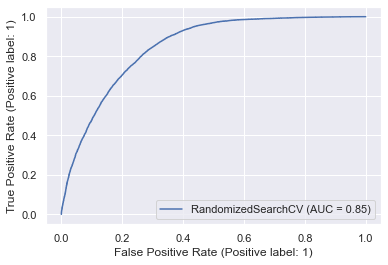

In [50]:
plot_roc_curve(search_cv, X_test_raw, y_test_raw) 

In [51]:
pred_scv = search_cv.predict(X_test_raw)
score = precision_score(y_test_raw, pred_scv)
score

0.7035720965027118

In [52]:
## defining the score & plot for roc_auc
def roc_auc_plot_score(y_test,y_pred_proba):
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc

In [53]:
pred_proba = search_cv.predict_proba(X_test_raw)[:,1]
pred_proba

array([0.59115271, 0.66777268, 0.2757103 , ..., 0.69421509, 0.6029771 ,
       0.09301785])

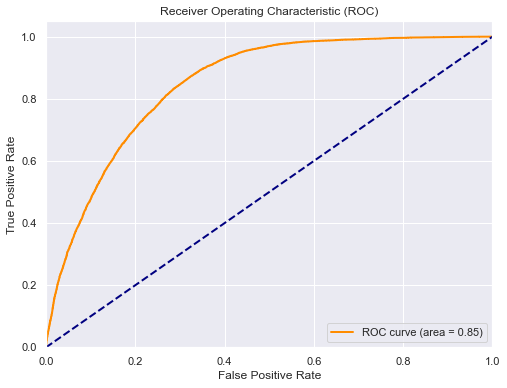

0.8479771222418386

In [54]:
roc_auc_plot_score(y_test_raw, pred_proba)

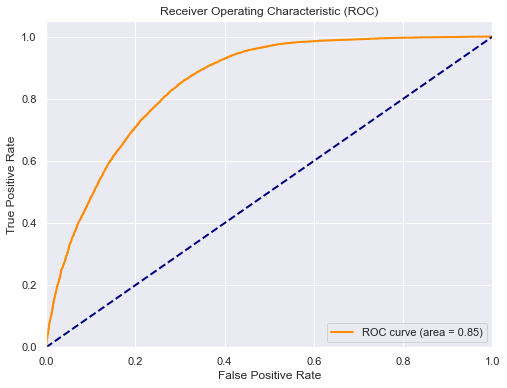

0.8489217474185728

In [55]:
bestmodel = search_cv.best_estimator_
bestmodel.fit(X_train_raw, y_train_raw)
pob = bestmodel.predict_proba(X_test_raw)[:,1]
roc_auc_plot_score(y_test_raw, pob)

In [56]:
model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), 
                                ("model", bestmodel),
                                ])

In [57]:
X_train_raw

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
135516,35,180,70,83.2,1.0,1.0,1,1,118,78,...,106,58,116,16.5,1,1.0,25,18,65,1
138652,25,170,75,80.0,1.5,1.2,1,1,136,81,...,197,46,92,16.3,1,1.0,19,22,23,0
32500,40,155,55,76.0,0.9,1.0,1,1,109,57,...,104,52,158,13.3,1,0.6,22,14,12,1
69485,40,150,45,74.0,0.9,1.0,1,1,112,67,...,72,72,142,13.9,3,0.7,31,27,19,0
155821,40,165,60,80.0,1.5,1.5,1,1,136,91,...,58,59,145,13.8,1,0.7,16,14,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155816,65,145,55,82.0,0.4,0.6,1,2,137,87,...,109,61,149,13.5,1,0.7,25,19,22,0
137001,45,175,90,96.0,1.0,1.0,1,1,129,84,...,187,46,114,17.5,1,1.1,33,67,113,0
135292,30,170,75,84.0,1.0,1.2,1,1,118,78,...,268,41,135,15.0,1,0.9,30,35,32,1
137754,40,170,70,84.0,0.7,1.0,1,1,142,104,...,125,47,122,16.4,1,1.2,36,45,69,0


In [58]:

predictions = bestmodel.predict_proba(df_test)[:,1]
predictions

array([0.6476538 , 0.27844121, 0.5746441 , ..., 0.46953206, 0.16601815,
       0.04759478])

In [60]:
df_submission

,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5
...,...,...
106166,265422,0.5
106167,265423,0.5
106168,265424,0.5
106169,265425,0.5


In [61]:
df_submission.smoking = predictions
df_submission.head()

,id,smoking
0,159256,0.647654
1,159257,0.278441
2,159258,0.574644
3,159259,0.062677
4,159260,0.593942


In [62]:
df_submission.to_csv("sample_submission.csv", index=False)